In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

금리 변화 범위 설정: +0.50 ~ -0.50 

In [2]:
rate_change_space = np.array(range(0, 55, 5)) / 100
rate_change_space

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

In [3]:
len(rate_change_space)

11

각 금리 변화에 대한 확률 설정: 0에서 제일 크고 양옆으로 갈수록 작아지도록

In [4]:
rate_change_prob = abs(rate_change_space - 0.5)
rate_change_prob

array([0.5 , 0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15, 0.1 , 0.05, 0.  ])

In [5]:
up_prob_matrix = np.vstack([rate_change_space, rate_change_prob])
up_prob_matrix

array([[0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ],
       [0.5 , 0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15, 0.1 , 0.05, 0.  ]])

In [6]:
down_prob_matrix = np.vstack([-rate_change_space, rate_change_prob])
down_prob_matrix

array([[-0.  , -0.05, -0.1 , -0.15, -0.2 , -0.25, -0.3 , -0.35, -0.4 ,
        -0.45, -0.5 ],
       [ 0.5 ,  0.45,  0.4 ,  0.35,  0.3 ,  0.25,  0.2 ,  0.15,  0.1 ,
         0.05,  0.  ]])

simulation function

In [14]:
def bank_rate_simulator(start_rate, period, up_matrix, down_matrix):
    
    results = []
    rate = start_rate
    for i in range(period):
        # 금리 인상인지 인하인지 먼저 주사위 던지고
        if np.random.rand() > 0.5:
            prob_matrix = up_matrix
        else:
            prob_matrix = down_matrix
            
        # 주사위 던져서 해당 변화율만큼 움직임
        dice = np.random.random()
        idx = np.argmax(up_prob_matrix[1] < dice)
        rate += prob_matrix[0, idx]
        results.append(rate)
        
    return results

In [15]:
rates = bank_rate_simulator(2.45, 12, up_prob_matrix, down_prob_matrix)

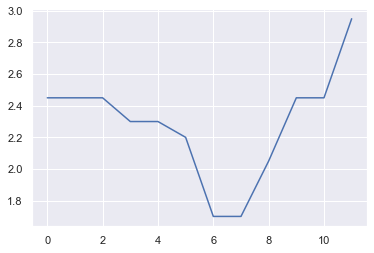

In [16]:
sns.set_theme()
ax = sns.lineplot(x=range(12), y=rates)